# Gender Recognition Based on Voice

By Laxman Singh Tomar

---

A lot can be achieved by analyzing Voice in Speech Analytics. And one of the most foundational tasks can be: Identifying the Gender with the help of Voice. In this project, I'll analyze and cover the workflow of how to detect the gender of the speaker using **MFCC** (Mel Frequency and Cepstral Coefficients) and **GMM** (Gaussian Mixture Models). I'll make use of the mentioned techniques to achieve noteworthy performance.

---

# Outline

1. Introduction to Project
    - 1.1 Project Objective
    - 1.2 Historical Context
    - 1.3 Project Workflow
    
    
2. Project Setup
    - 2.1 Importing the Libraries
    - 2.2 Importing the Data
    - 2.3 Managing the Data
    
    
3. What is MFCC?
    - 3.1 Building the Features Extractor


4. What are GMMs?
    - 3.2 Training the Models


5. Identifying the Gender


6. Conclusions and Analysis


7. Acknowledgements and References

---

# 1. Introduction of Project

## 1.1 Project Objective

To predict the gender of the speaker based on his/her voice samples.

---

## 1.2 Historical Context

Large amounts of computing power available alongwith Artificial Intelligent systems has resulted inflection into capability of machines to recognize the voices. Faster Processing and large amount of Speech Data available makes the performance of these sytems roughly on par with humans. From **Audrey** a speech recognizing system which could recognize a single voice speaking digits aloud at Bell Labs in 1952; we've reached to having day to day conversations with voice assistants like Google Assistant and Siri in our smartphones.

But most of these systems are usually neutral to the gender of the speaker and results being given. Having systems which can respond as per the user's gender is indeed an amazing capability. A large amount of tasks which are based on gender preferences can be handled by them. It results into better customer service and enhances user experience.

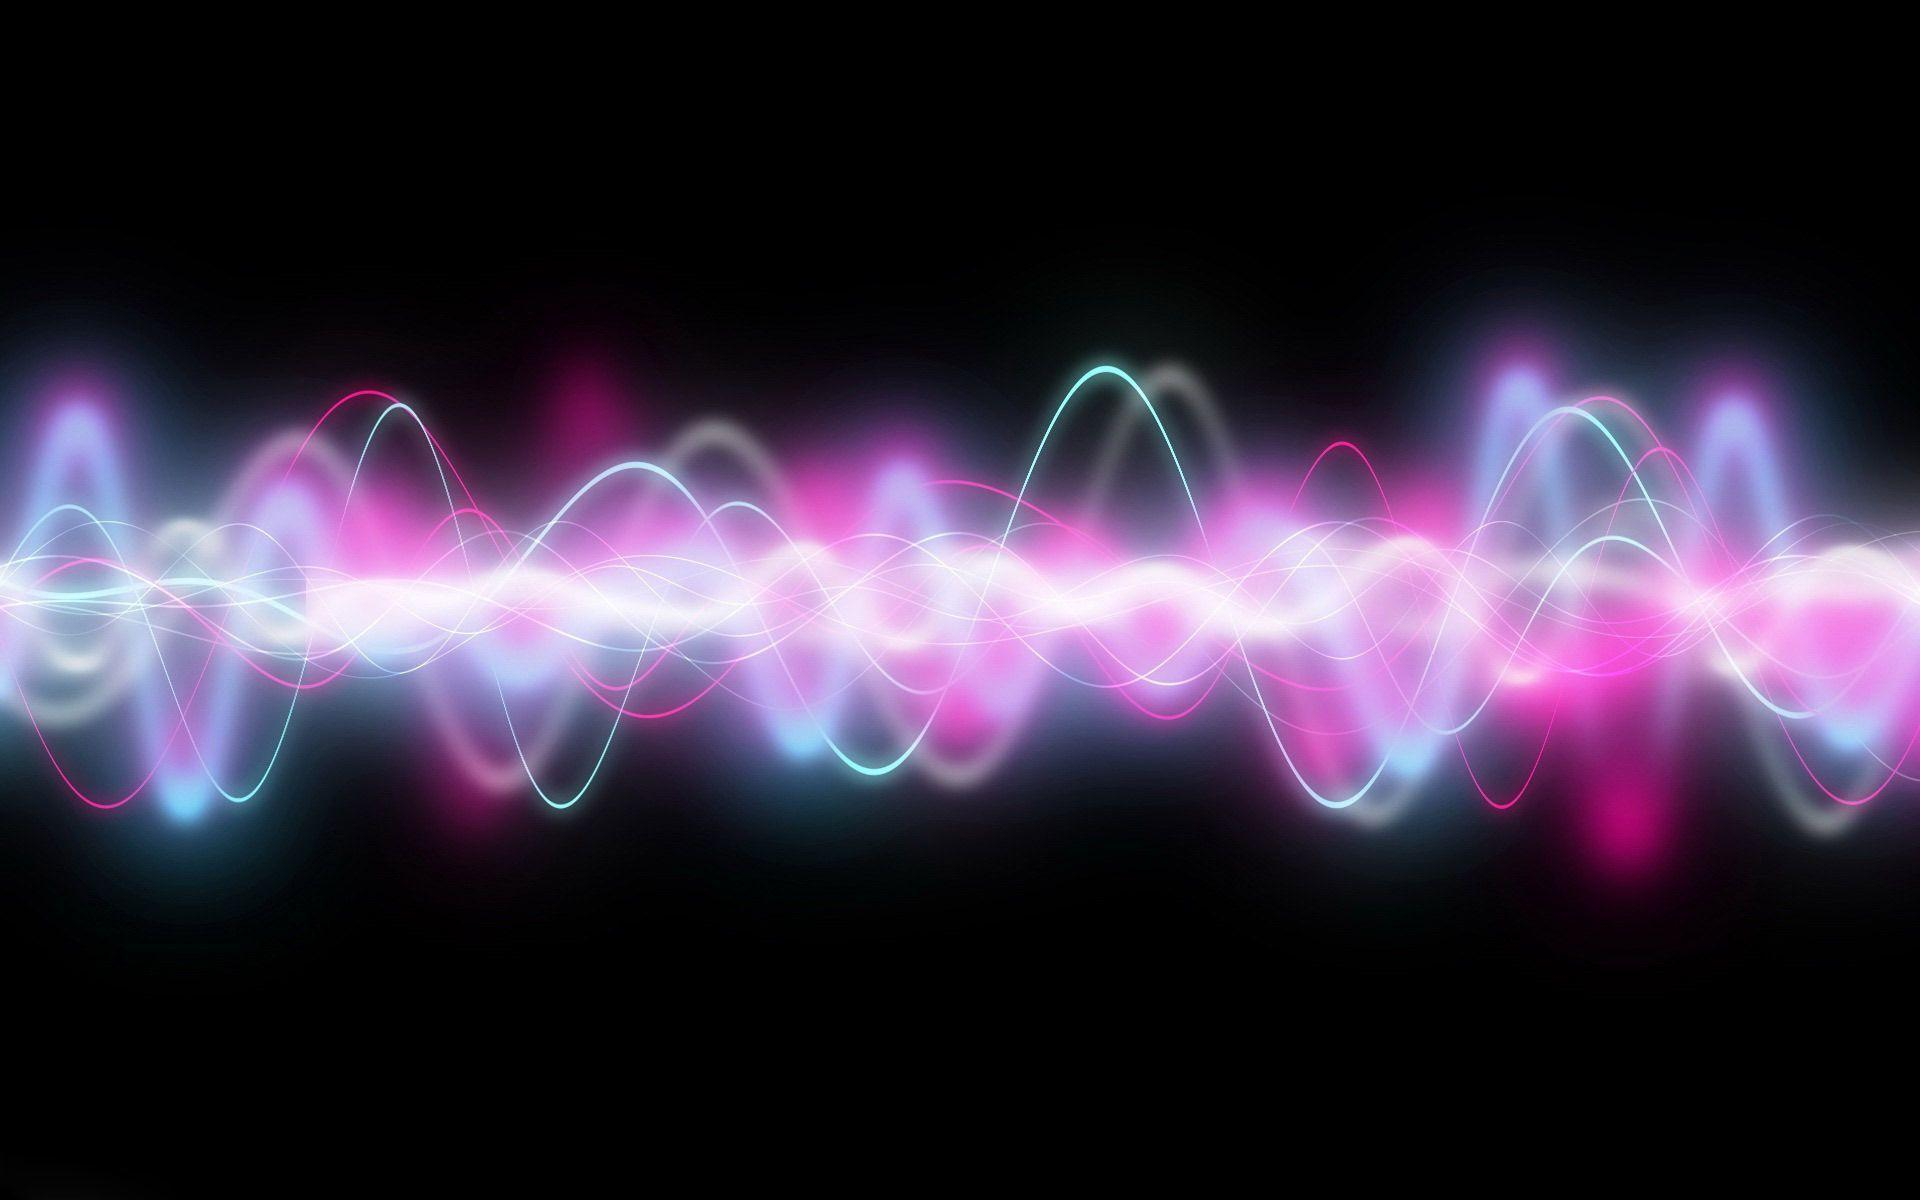

---

## 1.3 Project Workflow 

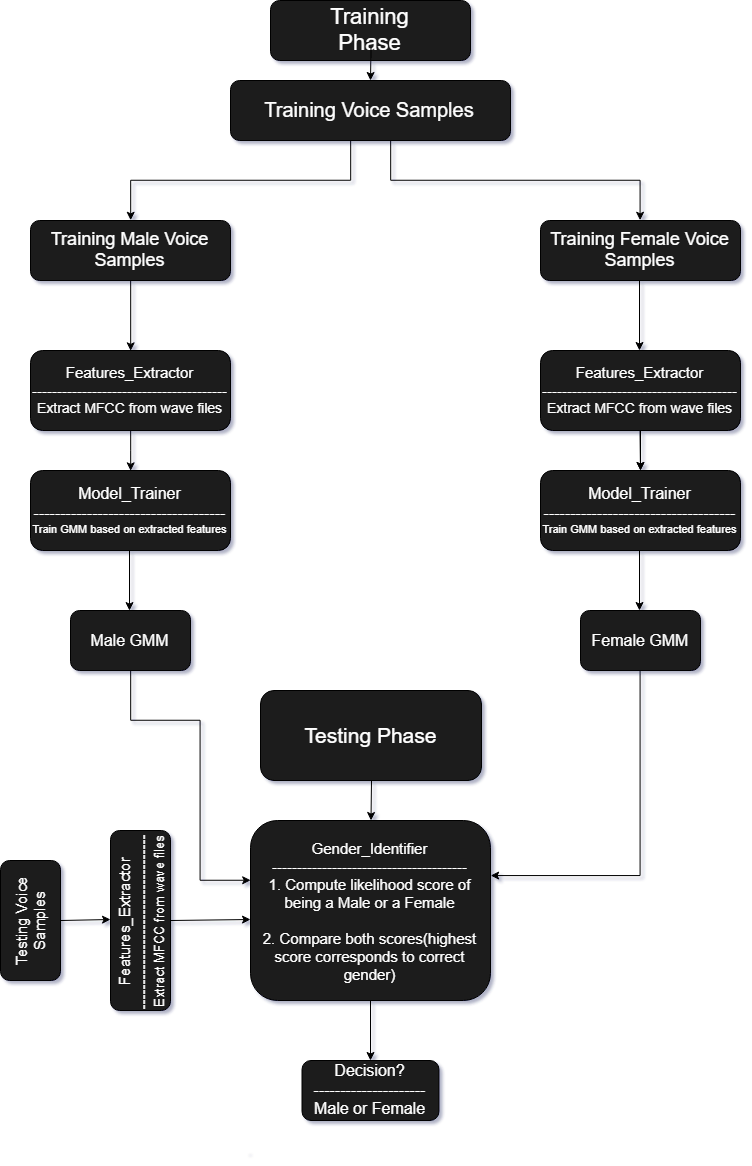

---

# 2. Project Setup

## 2.1 Importing the Libraries

Here I'm using one of the standard machine learning libraries which are available in scikit-learn along with numpy and pandas for data manipulation.

In [1]:
# Importing Libraries and Modules

# For Importing Files
import os
import sys
import math
import tarfile

# For Data Manipulation
import numpy as np
import pandas as pd

# For Audio Files Processing
from scipy.io.wavfile import read
from sklearn.mixture import GaussianMixture as GMM
from python_speech_features import mfcc
from python_speech_features import delta 
from sklearn import preprocessing

# To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# To Save Models
import pickle

---

## 2.2 Importing the Data

Data about voice samples of males and females is **The Free ST American English Corpus dataset** which can be downloaded from [here](https://www.openslr.org/45/)!. It contains utterances from 10 speakers, 5 from each gender. Each speaker has about 350 utterances.

Once you download your dataset, you need to split it into two parts:Training Set and Testing Set.

- **Training Set** : It's used to train the gender models. 


- **Testing Set** : It's used for testing the accuracy of the gender recognition.

The spilliting criterion depends totally on you. I'll prefer going with 2/3 for Training Set and rest for Testing Set. I'll create a class which will help us managing and formatting our data. We may need functions for following tasks:

1. A function for getting the path where our compressed dataset resides.


2. A function to extract files out of our compressed dataset.


3. A function to create separate folders for our training and testing files.


4. A function which can fill filenames into an empty dictionary.


5. A function which can move files into their respective folders.


6. And ofcourse a driver function for all of the above functions.


---

## 2.3 Managing the Data

In [2]:
class Data_Manager:
    # Function #1
    
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path

#-------------------------------------------------------------------------------------------------------------------------------
    # Function #2
    
    def extract_dataset(self, compressed_dataset_file_name, dataset_directory):
        try:
            tar = tarfile.open(compressed_dataset_file_name, "r:gz")
            tar.extractall(dataset_directory)
            tar.close()
            print("Files extraction was successful!")

        except:
            print("No extraction was performed !")
            
#-------------------------------------------------------------------------------------------------------------------------------
    # Function #3
    
    def make_folder(self, folder_path):
        try:
            os.mkdir(folder_path)
            print(folder_path, "was created !")
        except:
            print("Exception raised: ", folder_path, "could not be created !")
            
#-------------------------------------------------------------------------------------------------------------------------------
    # Function #4
    
    def get_fnames_from_dict(self, dataset_dict, f_or_m):
        training_data, testing_data = [], []

        for i in range(1,5):
            length_data       = len(dataset_dict[f_or_m +"000" + str(i)])
            length_separator  = math.trunc(length_data*2/3)

            training_data += dataset_dict[f_or_m + "000" + str(i)][:length_separator]
            testing_data  += dataset_dict[f_or_m + "000" + str(i)][length_separator:]

        return training_data, testing_data
    
#------------------------------------------------------------------------------------------------------------------------------   
    # Function #5
    
    def move_files(self, src, dst, group):
        for fname in group:
            os.rename(src + '/' + fname, dst + '/' + fname)

#------------------------------------------------------------------------------------------------------------------------------
    # Function #6
    
    def manage(self):

        compressed_dataset_file_name = self.dataset_path
        dataset_directory = compressed_dataset_file_name.split(".")[0]

        try:
            os.mkdir(dataset_directory)
        except:
            pass

        self.extract_dataset(compressed_dataset_file_name, dataset_directory)

        file_names   = [fname for fname in os.listdir(dataset_directory) if ("f0" in fname or "m0" in fname)]
        dataset_dict = {"f0001": [], "f0002": [], "f0003": [], "f0004": [], "f0005": [],
                        "m0001": [], "m0002": [], "m0003": [], "m0004": [], "m0005": [], }

        for fname in file_names:
            dataset_dict[fname.split('_')[0]].append(fname)

        training_set, testing_set = {},{}
        training_set["females"], testing_set["females"] = self.get_fnames_from_dict(dataset_dict, "f")
        training_set["males"  ], testing_set["males"  ] = self.get_fnames_from_dict(dataset_dict, "m")

        self.make_folder("TrainingData")
        self.make_folder("TestingData")
        self.make_folder("TrainingData/females")
        self.make_folder("TrainingData/males")
        self.make_folder("TestingData/females")
        self.make_folder("TestingData/males")

        self.move_files(dataset_directory, "TrainingData/females", training_set["females"])
        self.move_files(dataset_directory, "TrainingData/males",   training_set["males"])
        self.move_files(dataset_directory, "TestingData/females",  testing_set["females"])
        self.move_files(dataset_directory, "TestingData/males",    testing_set["males"])

#-------------------------------------------------------------------------------------------------------------------------------

if __name__== "__main__":
    data_manager = Data_Manager("SLR45.tgz")
    data_manager.manage()

Files extraction was successful!
TrainingData was created !
TestingData was created !
TrainingData/females was created !
TrainingData/males was created !
TestingData/females was created !
TestingData/males was created !


Let me expain briefly what I've done here:

1. **Function #1** : It gets path where our dataset resides!


2. **Function #2** : It extracts tar format file to a directory.


3. **Function #3** : It creates a folder for the Data.


4. **Function #4** : Create dictionaries from Training Set and Testing Set.


5. **Function #5** : Move files to their respective folders.


6. **Function #6** : It reads file & creates folder for the data where it'll decompress our dataset. Later it'll select our files and fill them in our dictionary, divide and group our file names. And finally when we're done creating folders for our files, it'll move them into their respective folders.

---

# 3. What is MFCC?

It's time to build a feature extractor now. There can be many acoustic features which can help distinguishing males from females, but I'm here gonna use **MFCC** or **Mel Frequency Cepstral Co-efficients**, since it's one of the best acoustic feature in terms of results. Generally here's how they're derived:

1. Take the Fourier transform of (a windowed excerpt of) a signal. It transforms the time domain signal into spectral domain signal where source and filter part are now in multiplication.


2. Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.


3. Take the logs of the powers at each of the mel frequencies. It helps in separating source and filter.


4. Take the discrete cosine transform of the list of mel log powers, as if it were a signal. 


5. The MFCCs are the amplitudes of the resulting spectrum.

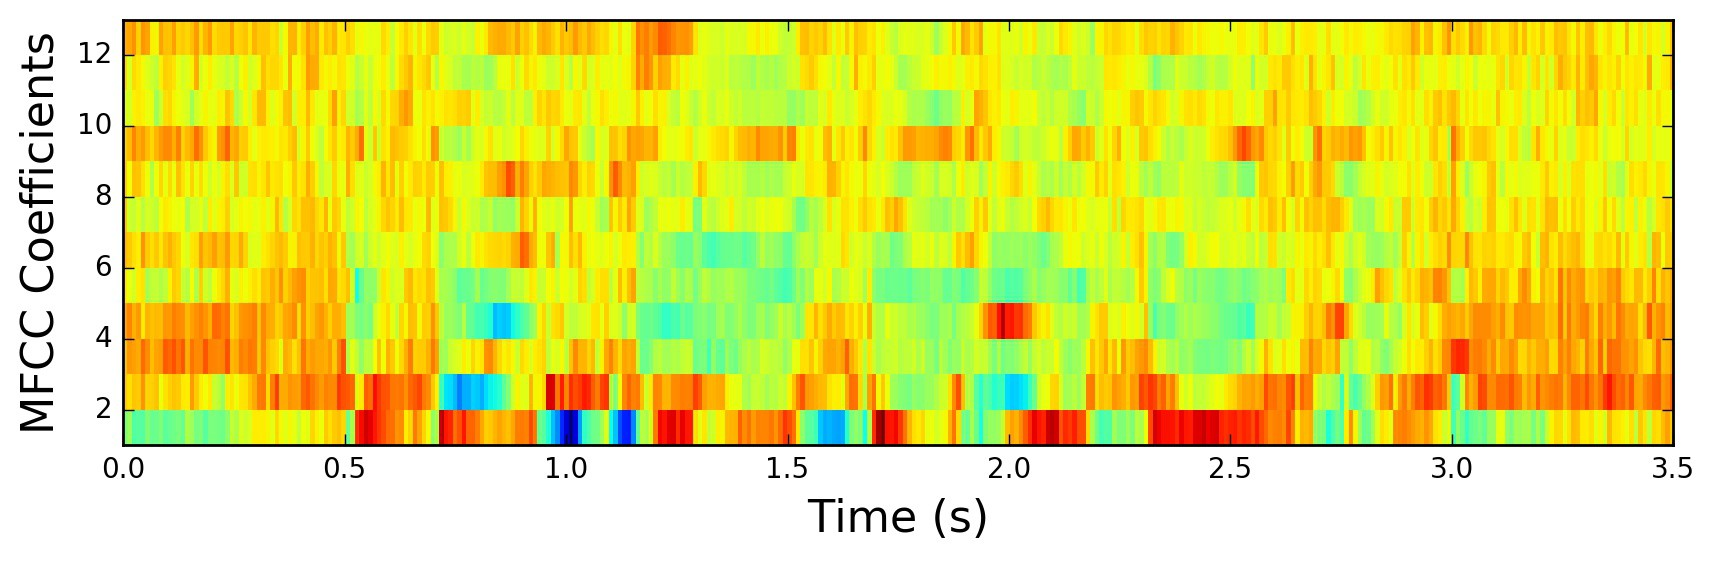

---

## 3.1 Building Features Extractor

To extract MFCC features, I'm gonna make use of a python module named:python_speech_features. It's simple to apply, and has a good documentation for support.

It's best suitable to build a class and encaspulate a function which does features extraction for us:

In [3]:
class Features_Extractor:
    def __init__(self):
        pass
       
    def extract_features(self, audio_path):
        rate, audio  = read(audio_path)
        mfcc_feature = mfcc(audio, rate, winlen = 0.05, winstep = 0.01, numcep = 5, nfilt = 30, nfft = 800, appendEnergy = True)
      
        mfcc_feature  = preprocessing.scale(mfcc_feature)
        deltas        = delta(mfcc_feature, 2)
        double_deltas = delta(deltas, 2)
        combined      = np.hstack((mfcc_feature, deltas, double_deltas))
        return combined

Let's see what I've just done here! I've built a function which extracts MFCC from audio files and performs the CMS normalization and later I've combined it with MFCC deltas and double_deltas. It takes audio_path i.e path to the audio wave and returns an array or extracted features matrix.

MFCC function has several arguments, they signify:

- **audio**: Audio signal from which we've to compute features


- **rate** : Sample rate of the audio signal we're working with


- **winlen**: Length of the analysis window in seconds; default is 0.025s (25 milliseconds)


- **winstep**: Default step between successive windows in seconds; default is 0.01s (10 milliseconds)


- **numcep**: Number of Cepstrum to return; default is 13


- **nfilt**: Number of filters in the filterbank; default is 26


- **nfft**: Size of the fft; default is 512


- **appendEnergy**: If it's set True, the zeroth cepstral coefficient is replaced with log of total frame energy

---

# 4. What are GMMs?

> A Gaussian Mixture Model (GMM) is a parametric probability density function represented as a weighted sum of Gaussian component densities. GMMs are commonly used as a parametric model of the probability distribution of continuous measurements or features in a biometric system, such as vocal-tract related spectral features in a speaker recognition system. GMM parameters are estimated from training data using the iterative Expectation-Maximization (EM) algorithm or Maximum A Posteriori(MAP) estimation from a well-trained prior model. 
>
> [D. Reynolds](https://www.semanticscholar.org/paper/Gaussian-Mixture-Models-Reynolds/734b07b53c23f74a3b004d7fe341ae4fce462fc6)

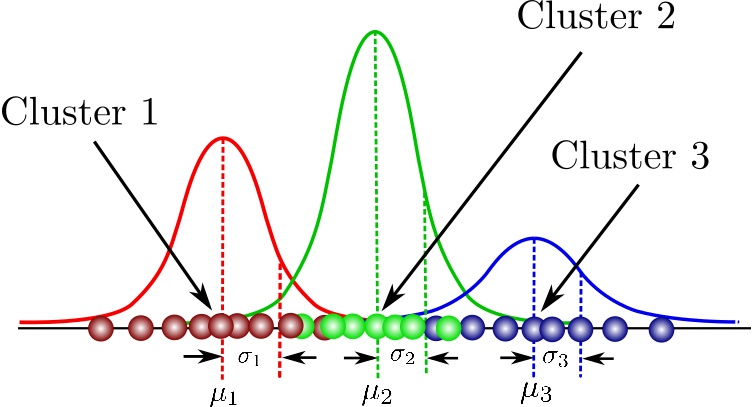

A Gaussian Mixture Model popularly known as GMM is a probabilistic clustering model for reprenting a certain data distribution as a sum of Gaussian Density Functions. These densities forming a GMM are also known as components of GMM. The likelihood of a data point is given by the following equation:


$P(X|\lambda) = \sum_{k=1}^{K} w_k P_k(X|\mu_k, \Sigma_k)  $




where $P_k(X|\mu_k, \Sigma_k) $ is the Gaussian Distribution:




$P_k(X|\mu_k,\Sigma_k) = \frac{1}{{\sqrt{2\pi|\Sigma_k|}}} \thinspace e^{\frac{1}{2}(X-\mu_k)^T \Sigma^{-1}(X-\mu_k)}$   

where:

$\lambda$ : It represents Training Data.

$\mu$ : It represents the mean.

$\Sigma$ : It represents the co-variance matrices.

$w_k$ : It represents the weights.

$k$ : It represents the index of the components.

---

## 4.1 Training the Models

I'm going to build a class where I'll train my audio samples. It'll be a tedious task if I'll write it in separate cells, so I'll stick with the same cell. Let's see what I aim to achieve here:

1. A function which can assign paths to where our voice samples resides


2. A function which collects voice features from the files


3. A function where I will generate GMM Models and later would fit our features


4. A function where I will save our newly constructed GMM Models

In [5]:
class Models_Trainer:
    
    # Function #1
    
    def __init__(self, females_files_path, males_files_path):
        self.females_training_path = females_files_path
        self.males_training_path   = males_files_path
        self.features_extractor    = Features_Extractor()
#-----------------------------------------------------------------------------------------------------------------------------        
    
    # Function #2
    
    def get_file_paths(self, females_training_path, males_training_path):
        females = [ os.path.join(females_training_path, f) for f in os.listdir(females_training_path) ]
        males   = [ os.path.join(males_training_path, f) for f in os.listdir(males_training_path) ]
        return females, males
    
#-----------------------------------------------------------------------------------------------------------------------------
    
    # Function #3  
    
    def collect_features(self, files):
        features = np.asarray(())
        
        for file in files:
            print("%5s %10s" % ("Processing ", file))
            vector = self.features_extractor.extract_features(file)
            if features.size == 0: 
                features = vector
            else:
                features = np.vstack((features, vector))
        return features
    
#------------------------------------------------------------------------------------------------------------------------------ 
    # Function #4
    
    def process(self):
        females, males = self.get_file_paths(self.females_training_path,self.males_training_path)
        
        female_voice_features = self.collect_features(females)
        male_voice_features   = self.collect_features(males)
        
        females_gmm = GMM(n_components = 16, max_iter = 200, covariance_type='diag', n_init = 3)
        males_gmm   = GMM(n_components = 16, max_iter = 200, covariance_type='diag', n_init = 3)
        
        females_gmm.fit(female_voice_features)
        males_gmm.fit(male_voice_features)
        
        self.save_gmm(females_gmm, "females")
        self.save_gmm(males_gmm,   "males")

#-----------------------------------------------------------------------------------------------------------------------------
    # Function #5
    
    def save_gmm(self, gmm, name):

        filename = name + ".gmm"
        
        with open(filename, 'wb') as gmm_file:
            pickle.dump(gmm, gmm_file)
        print ("%5s %10s" % ("Saving", filename,))

#-----------------------------------------------------------------------------------------------------------------------------
if __name__== "__main__":
    models_trainer = Models_Trainer("TrainingData/females", "TrainingData/males")
    models_trainer.process()

Processing  TrainingData/females\f0001_us_f0001_00001.wav
Processing  TrainingData/females\f0001_us_f0001_00002.wav
Processing  TrainingData/females\f0001_us_f0001_00003.wav
Processing  TrainingData/females\f0001_us_f0001_00004.wav
Processing  TrainingData/females\f0001_us_f0001_00005.wav
Processing  TrainingData/females\f0001_us_f0001_00006.wav
Processing  TrainingData/females\f0001_us_f0001_00007.wav
Processing  TrainingData/females\f0001_us_f0001_00008.wav
Processing  TrainingData/females\f0001_us_f0001_00009.wav
Processing  TrainingData/females\f0001_us_f0001_00010.wav
Processing  TrainingData/females\f0001_us_f0001_00011.wav
Processing  TrainingData/females\f0001_us_f0001_00012.wav
Processing  TrainingData/females\f0001_us_f0001_00013.wav
Processing  TrainingData/females\f0001_us_f0001_00014.wav
Processing  TrainingData/females\f0001_us_f0001_00015.wav
Processing  TrainingData/females\f0001_us_f0001_00016.wav
Processing  TrainingData/females\f0001_us_f0001_00017.wav
Processing  Tr

Processing  TrainingData/females\f0001_us_f0001_00145.wav
Processing  TrainingData/females\f0001_us_f0001_00146.wav
Processing  TrainingData/females\f0001_us_f0001_00147.wav
Processing  TrainingData/females\f0001_us_f0001_00148.wav
Processing  TrainingData/females\f0001_us_f0001_00149.wav
Processing  TrainingData/females\f0001_us_f0001_00150.wav
Processing  TrainingData/females\f0001_us_f0001_00151.wav
Processing  TrainingData/females\f0001_us_f0001_00152.wav
Processing  TrainingData/females\f0001_us_f0001_00153.wav
Processing  TrainingData/females\f0001_us_f0001_00154.wav
Processing  TrainingData/females\f0001_us_f0001_00155.wav
Processing  TrainingData/females\f0001_us_f0001_00156.wav
Processing  TrainingData/females\f0001_us_f0001_00157.wav
Processing  TrainingData/females\f0001_us_f0001_00158.wav
Processing  TrainingData/females\f0001_us_f0001_00159.wav
Processing  TrainingData/females\f0001_us_f0001_00160.wav
Processing  TrainingData/females\f0001_us_f0001_00161.wav
Processing  Tr

Processing  TrainingData/females\f0001_us_f0001_00287.wav
Processing  TrainingData/females\f0001_us_f0001_00288.wav
Processing  TrainingData/females\f0001_us_f0001_00289.wav
Processing  TrainingData/females\f0001_us_f0001_00290.wav
Processing  TrainingData/females\f0001_us_f0001_00291.wav
Processing  TrainingData/females\f0001_us_f0001_00292.wav
Processing  TrainingData/females\f0001_us_f0001_00293.wav
Processing  TrainingData/females\f0001_us_f0001_00294.wav
Processing  TrainingData/females\f0002_us_f0002_00001.wav
Processing  TrainingData/females\f0002_us_f0002_00002.wav
Processing  TrainingData/females\f0002_us_f0002_00003.wav
Processing  TrainingData/females\f0002_us_f0002_00004.wav
Processing  TrainingData/females\f0002_us_f0002_00005.wav
Processing  TrainingData/females\f0002_us_f0002_00006.wav
Processing  TrainingData/females\f0002_us_f0002_00007.wav
Processing  TrainingData/females\f0002_us_f0002_00008.wav
Processing  TrainingData/females\f0002_us_f0002_00009.wav
Processing  Tr

Processing  TrainingData/females\f0002_us_f0002_00140.wav
Processing  TrainingData/females\f0002_us_f0002_00141.wav
Processing  TrainingData/females\f0002_us_f0002_00142.wav
Processing  TrainingData/females\f0002_us_f0002_00143.wav
Processing  TrainingData/females\f0002_us_f0002_00144.wav
Processing  TrainingData/females\f0002_us_f0002_00145.wav
Processing  TrainingData/females\f0002_us_f0002_00146.wav
Processing  TrainingData/females\f0002_us_f0002_00147.wav
Processing  TrainingData/females\f0002_us_f0002_00148.wav
Processing  TrainingData/females\f0002_us_f0002_00149.wav
Processing  TrainingData/females\f0002_us_f0002_00150.wav
Processing  TrainingData/females\f0002_us_f0002_00151.wav
Processing  TrainingData/females\f0002_us_f0002_00152.wav
Processing  TrainingData/females\f0002_us_f0002_00153.wav
Processing  TrainingData/females\f0002_us_f0002_00154.wav
Processing  TrainingData/females\f0002_us_f0002_00155.wav
Processing  TrainingData/females\f0002_us_f0002_00156.wav
Processing  Tr

Processing  TrainingData/females\f0003_us_f0003_00015.wav
Processing  TrainingData/females\f0003_us_f0003_00016.wav
Processing  TrainingData/females\f0003_us_f0003_00017.wav
Processing  TrainingData/females\f0003_us_f0003_00018.wav
Processing  TrainingData/females\f0003_us_f0003_00019.wav
Processing  TrainingData/females\f0003_us_f0003_00020.wav
Processing  TrainingData/females\f0003_us_f0003_00021.wav
Processing  TrainingData/females\f0003_us_f0003_00022.wav
Processing  TrainingData/females\f0003_us_f0003_00023.wav
Processing  TrainingData/females\f0003_us_f0003_00024.wav
Processing  TrainingData/females\f0003_us_f0003_00025.wav
Processing  TrainingData/females\f0003_us_f0003_00026.wav
Processing  TrainingData/females\f0003_us_f0003_00027.wav
Processing  TrainingData/females\f0003_us_f0003_00028.wav
Processing  TrainingData/females\f0003_us_f0003_00029.wav
Processing  TrainingData/females\f0003_us_f0003_00030.wav
Processing  TrainingData/females\f0003_us_f0003_00031.wav
Processing  Tr

Processing  TrainingData/females\f0003_us_f0003_00158.wav
Processing  TrainingData/females\f0003_us_f0003_00159.wav
Processing  TrainingData/females\f0003_us_f0003_00160.wav
Processing  TrainingData/females\f0003_us_f0003_00161.wav
Processing  TrainingData/females\f0003_us_f0003_00162.wav
Processing  TrainingData/females\f0003_us_f0003_00163.wav
Processing  TrainingData/females\f0003_us_f0003_00164.wav
Processing  TrainingData/females\f0003_us_f0003_00165.wav
Processing  TrainingData/females\f0003_us_f0003_00166.wav
Processing  TrainingData/females\f0003_us_f0003_00167.wav
Processing  TrainingData/females\f0003_us_f0003_00168.wav
Processing  TrainingData/females\f0003_us_f0003_00169.wav
Processing  TrainingData/females\f0003_us_f0003_00170.wav
Processing  TrainingData/females\f0003_us_f0003_00171.wav
Processing  TrainingData/females\f0003_us_f0003_00172.wav
Processing  TrainingData/females\f0003_us_f0003_00173.wav
Processing  TrainingData/females\f0003_us_f0003_00174.wav
Processing  Tr

Processing  TrainingData/females\f0003_us_f0003_00301.wav
Processing  TrainingData/females\f0003_us_f0003_00302.wav
Processing  TrainingData/females\f0003_us_f0003_00303.wav
Processing  TrainingData/females\f0003_us_f0003_00304.wav
Processing  TrainingData/females\f0003_us_f0003_00305.wav
Processing  TrainingData/females\f0003_us_f0003_00306.wav
Processing  TrainingData/females\f0004_us_f0004_00001.wav
Processing  TrainingData/females\f0004_us_f0004_00002.wav
Processing  TrainingData/females\f0004_us_f0004_00003.wav
Processing  TrainingData/females\f0004_us_f0004_00004.wav
Processing  TrainingData/females\f0004_us_f0004_00005.wav
Processing  TrainingData/females\f0004_us_f0004_00006.wav
Processing  TrainingData/females\f0004_us_f0004_00007.wav
Processing  TrainingData/females\f0004_us_f0004_00008.wav
Processing  TrainingData/females\f0004_us_f0004_00009.wav
Processing  TrainingData/females\f0004_us_f0004_00010.wav
Processing  TrainingData/females\f0004_us_f0004_00011.wav
Processing  Tr

Processing  TrainingData/females\f0004_us_f0004_00138.wav
Processing  TrainingData/females\f0004_us_f0004_00139.wav
Processing  TrainingData/females\f0004_us_f0004_00140.wav
Processing  TrainingData/females\f0004_us_f0004_00141.wav
Processing  TrainingData/females\f0004_us_f0004_00142.wav
Processing  TrainingData/females\f0004_us_f0004_00143.wav
Processing  TrainingData/females\f0004_us_f0004_00144.wav
Processing  TrainingData/females\f0004_us_f0004_00145.wav
Processing  TrainingData/females\f0004_us_f0004_00146.wav
Processing  TrainingData/females\f0004_us_f0004_00147.wav
Processing  TrainingData/females\f0004_us_f0004_00148.wav
Processing  TrainingData/females\f0004_us_f0004_00149.wav
Processing  TrainingData/females\f0004_us_f0004_00150.wav
Processing  TrainingData/females\f0004_us_f0004_00151.wav
Processing  TrainingData/females\f0004_us_f0004_00152.wav
Processing  TrainingData/females\f0004_us_f0004_00153.wav
Processing  TrainingData/females\f0004_us_f0004_00154.wav
Processing  Tr

Processing  TrainingData/females\f0004_us_f0004_00280.wav
Processing  TrainingData/females\f0004_us_f0004_00281.wav
Processing  TrainingData/females\f0004_us_f0004_00282.wav
Processing  TrainingData/females\f0004_us_f0004_00283.wav
Processing  TrainingData/females\f0004_us_f0004_00284.wav
Processing  TrainingData/females\f0004_us_f0004_00285.wav
Processing  TrainingData/females\f0004_us_f0004_00286.wav
Processing  TrainingData/females\f0004_us_f0004_00287.wav
Processing  TrainingData/females\f0004_us_f0004_00288.wav
Processing  TrainingData/females\f0004_us_f0004_00289.wav
Processing  TrainingData/females\f0004_us_f0004_00290.wav
Processing  TrainingData/females\f0004_us_f0004_00291.wav
Processing  TrainingData/females\f0004_us_f0004_00292.wav
Processing  TrainingData/females\f0004_us_f0004_00293.wav
Processing  TrainingData/females\f0004_us_f0004_00294.wav
Processing  TrainingData/females\f0004_us_f0004_00295.wav
Processing  TrainingData/females\f0004_us_f0004_00296.wav
Processing  Tr

Processing  TrainingData/males\m0001_us_m0001_00130.wav
Processing  TrainingData/males\m0001_us_m0001_00131.wav
Processing  TrainingData/males\m0001_us_m0001_00132.wav
Processing  TrainingData/males\m0001_us_m0001_00133.wav
Processing  TrainingData/males\m0001_us_m0001_00134.wav
Processing  TrainingData/males\m0001_us_m0001_00135.wav
Processing  TrainingData/males\m0001_us_m0001_00136.wav
Processing  TrainingData/males\m0001_us_m0001_00137.wav
Processing  TrainingData/males\m0001_us_m0001_00138.wav
Processing  TrainingData/males\m0001_us_m0001_00139.wav
Processing  TrainingData/males\m0001_us_m0001_00140.wav
Processing  TrainingData/males\m0001_us_m0001_00141.wav
Processing  TrainingData/males\m0001_us_m0001_00142.wav
Processing  TrainingData/males\m0001_us_m0001_00143.wav
Processing  TrainingData/males\m0001_us_m0001_00144.wav
Processing  TrainingData/males\m0001_us_m0001_00145.wav
Processing  TrainingData/males\m0001_us_m0001_00146.wav
Processing  TrainingData/males\m0001_us_m0001_00

Processing  TrainingData/males\m0002_us_m0002_00060.wav
Processing  TrainingData/males\m0002_us_m0002_00061.wav
Processing  TrainingData/males\m0002_us_m0002_00062.wav
Processing  TrainingData/males\m0002_us_m0002_00063.wav
Processing  TrainingData/males\m0002_us_m0002_00064.wav
Processing  TrainingData/males\m0002_us_m0002_00065.wav
Processing  TrainingData/males\m0002_us_m0002_00066.wav
Processing  TrainingData/males\m0002_us_m0002_00067.wav
Processing  TrainingData/males\m0002_us_m0002_00068.wav
Processing  TrainingData/males\m0002_us_m0002_00069.wav
Processing  TrainingData/males\m0002_us_m0002_00070.wav
Processing  TrainingData/males\m0002_us_m0002_00071.wav
Processing  TrainingData/males\m0002_us_m0002_00072.wav
Processing  TrainingData/males\m0002_us_m0002_00073.wav
Processing  TrainingData/males\m0002_us_m0002_00074.wav
Processing  TrainingData/males\m0002_us_m0002_00075.wav
Processing  TrainingData/males\m0002_us_m0002_00076.wav
Processing  TrainingData/males\m0002_us_m0002_00

Processing  TrainingData/males\m0002_us_m0002_00207.wav
Processing  TrainingData/males\m0002_us_m0002_00208.wav
Processing  TrainingData/males\m0002_us_m0002_00209.wav
Processing  TrainingData/males\m0002_us_m0002_00210.wav
Processing  TrainingData/males\m0002_us_m0002_00211.wav
Processing  TrainingData/males\m0002_us_m0002_00212.wav
Processing  TrainingData/males\m0002_us_m0002_00213.wav
Processing  TrainingData/males\m0002_us_m0002_00214.wav
Processing  TrainingData/males\m0002_us_m0002_00215.wav
Processing  TrainingData/males\m0002_us_m0002_00216.wav
Processing  TrainingData/males\m0002_us_m0002_00217.wav
Processing  TrainingData/males\m0002_us_m0002_00218.wav
Processing  TrainingData/males\m0002_us_m0002_00219.wav
Processing  TrainingData/males\m0002_us_m0002_00220.wav
Processing  TrainingData/males\m0002_us_m0002_00221.wav
Processing  TrainingData/males\m0002_us_m0002_00222.wav
Processing  TrainingData/males\m0002_us_m0002_00223.wav
Processing  TrainingData/males\m0002_us_m0002_00

Processing  TrainingData/males\m0003_us_m0003_00116.wav
Processing  TrainingData/males\m0003_us_m0003_00117.wav
Processing  TrainingData/males\m0003_us_m0003_00118.wav
Processing  TrainingData/males\m0003_us_m0003_00119.wav
Processing  TrainingData/males\m0003_us_m0003_00120.wav
Processing  TrainingData/males\m0003_us_m0003_00121.wav
Processing  TrainingData/males\m0003_us_m0003_00122.wav
Processing  TrainingData/males\m0003_us_m0003_00123.wav
Processing  TrainingData/males\m0003_us_m0003_00124.wav
Processing  TrainingData/males\m0003_us_m0003_00125.wav
Processing  TrainingData/males\m0003_us_m0003_00126.wav
Processing  TrainingData/males\m0003_us_m0003_00127.wav
Processing  TrainingData/males\m0003_us_m0003_00128.wav
Processing  TrainingData/males\m0003_us_m0003_00129.wav
Processing  TrainingData/males\m0003_us_m0003_00130.wav
Processing  TrainingData/males\m0003_us_m0003_00131.wav
Processing  TrainingData/males\m0003_us_m0003_00132.wav
Processing  TrainingData/males\m0003_us_m0003_00

Processing  TrainingData/males\m0004_us_m0004_00031.wav
Processing  TrainingData/males\m0004_us_m0004_00032.wav
Processing  TrainingData/males\m0004_us_m0004_00033.wav
Processing  TrainingData/males\m0004_us_m0004_00034.wav
Processing  TrainingData/males\m0004_us_m0004_00035.wav
Processing  TrainingData/males\m0004_us_m0004_00036.wav
Processing  TrainingData/males\m0004_us_m0004_00037.wav
Processing  TrainingData/males\m0004_us_m0004_00038.wav
Processing  TrainingData/males\m0004_us_m0004_00039.wav
Processing  TrainingData/males\m0004_us_m0004_00040.wav
Processing  TrainingData/males\m0004_us_m0004_00041.wav
Processing  TrainingData/males\m0004_us_m0004_00042.wav
Processing  TrainingData/males\m0004_us_m0004_00043.wav
Processing  TrainingData/males\m0004_us_m0004_00044.wav
Processing  TrainingData/males\m0004_us_m0004_00045.wav
Processing  TrainingData/males\m0004_us_m0004_00046.wav
Processing  TrainingData/males\m0004_us_m0004_00047.wav
Processing  TrainingData/males\m0004_us_m0004_00

Okay, I'll explain what I've done here. Lemme go through each function and succinctly tell you what's happening:

1. **Function #1** : It assigns the paths of the female and male audio samples to their respective variables; signifying that these are training samples.


2. **Function #2** : It gets the file paths and stores them in their respective appropriate variable names.


3. **Function #3** : It collects various features from the people of the same gender. It takes up audio samples, and returns extracted features matrix. It extracts MFCC and delta features and stacks them.


4. **Function #4** : This function gathers features from Function #3, generates GMM Models and later fits features collected to them. There are 2 separate models for males and females. Finally, generated models are saved.


5. **Function #5** : It's always to better to save your models so you don't have to iterate the whole process again.It takes the GMM models and the filename. Pickle Module is used to dump the models just generated.

---

# 5. Identifying the Gender

Finally, all the pieces are about to chip in the right place. We've already collected features, fitted them to our generated GMM models. It's time to see how it works on samples it hasn't seen yet!

I'm going to create a class once again, which encapsulates several functions. Let's see what I wish to achieve here:

1. A function for necessary variables and to load our previously saved GMM models.


2. A function which can return where our voice samples to be tested resides.


3. A function to identify the gender by computing the likelihood of male and female voice samples.


4. A function which can read the samples and can declare the better likelihood out of two and to predict results.

In [6]:
class Gender_Identifier:
    
    # Function #1
    
    def __init__(self, females_files_path, males_files_path, females_model_path, males_model_path):
        self.females_training_path = females_files_path
        self.males_training_path   = males_files_path
        self.error                 = 0
        self.total_sample          = 0
        self.features_extractor    = Features_Extractor()
        
        self.females_gmm = pickle.load(open(females_model_path, 'rb'))
        self.males_gmm   = pickle.load(open(males_model_path, 'rb'))

#------------------------------------------------------------------------------------------------------------------------------
    
    # Function #2
    
    def get_file_paths(self, females_training_path, males_training_path):

        females = [ os.path.join(females_training_path, f) for f in os.listdir(females_training_path) ]
        males   = [ os.path.join(males_training_path, f) for f in os.listdir(males_training_path) ]
        files   = females + males
        return files

#------------------------------------------------------------------------------------------------------------------------------    
    
    # Function #3
    
    def identify_gender(self, vector):

        female_scores         = np.array(self.females_gmm.score(vector))
        female_log_likelihood = female_scores.sum()
        
        male_scores         = np.array(self.males_gmm.score(vector))
        male_log_likelihood = male_scores.sum()

        print("%10s %5s %1s" % ("+ Female Score",":", str(round(female_log_likelihood, 3))))
        print("%10s %7s %1s" % ("+ Male Score", ":", str(round(male_log_likelihood,3))))

        if male_log_likelihood > female_log_likelihood:
            winner = "male"
        else: 
            winner = "female"
        return winner

    
#---------------------------------------------------------------------------------------------------------------------------
    
    # Function #4
    
    def process(self):
        files = self.get_file_paths(self.females_training_path, self.males_training_path)

        for file in files:
            self.total_sample += 1
            print("%10s %8s %1s" % ("--> Testing", ":", os.path.basename(file)))

            vector = self.features_extractor.extract_features(file)
            winner = self.identify_gender(vector)
            expected_gender = file.split("/")[1][:-26]

            print("%10s %6s %1s" % ("+ Expectation",":", expected_gender))
            print("%10s %3s %1s" %  ("+ Identification", ":", winner))

            if winner != expected_gender:
                self.error += 1
            print("----------------------------------------------------")

        accuracy     = ( float(self.total_sample - self.error) / float(self.total_sample) ) * 100
        accuracy_msg = "*** Accuracy = " + str(round(accuracy, 3)) + "% ***"
        print(accuracy_msg)


#------------------------------------------------------------------------------------------------------------------------------

if __name__== "__main__":
    gender_identifier = Gender_Identifier("TestingData/females", "TestingData/males", "females.gmm", "males.gmm")
    gender_identifier.process()

--> Testing        : f0001_us_f0001_00295.wav
+ Female Score     : 5.132
+ Male Score       : 3.931
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00296.wav
+ Female Score     : 10.733
+ Male Score       : 9.068
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00297.wav
+ Female Score     : 8.981
+ Male Score       : 7.988
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00298.wav
+ Female Score     : 7.506
+ Male Score       : 6.195
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00299.wav
+ Female Score     : 6.392
+ Male Score       : 5.368
+ Expectation      : female
+ Identification   : female
-------

+ Female Score     : 5.868
+ Male Score       : 4.822
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00338.wav
+ Female Score     : 6.638
+ Male Score       : 4.838
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00339.wav
+ Female Score     : 7.523
+ Male Score       : 6.203
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00340.wav
+ Female Score     : 4.399
+ Male Score       : 3.115
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00341.wav
+ Female Score     : 5.476
+ Male Score       : 4.054
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
-

+ Female Score     : 6.077
+ Male Score       : 5.136
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00380.wav
+ Female Score     : 4.959
+ Male Score       : 3.911
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00381.wav
+ Female Score     : 7.44
+ Male Score       : 6.085
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00382.wav
+ Female Score     : 5.023
+ Male Score       : 3.453
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00383.wav
+ Female Score     : 7.248
+ Male Score       : 5.903
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--

+ Female Score     : 6.081
+ Male Score       : 4.894
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00424.wav
+ Female Score     : 5.277
+ Male Score       : 3.76
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00425.wav
+ Female Score     : 6.414
+ Male Score       : 5.011
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00426.wav
+ Female Score     : 5.233
+ Male Score       : 4.249
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0001_us_f0001_00427.wav
+ Female Score     : 7.602
+ Male Score       : 6.805
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--

+ Female Score     : 10.18
+ Male Score       : 9.432
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00294.wav
+ Female Score     : 9.481
+ Male Score       : 8.952
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00295.wav
+ Female Score     : 6.963
+ Male Score       : 5.671
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00296.wav
+ Female Score     : 11.125
+ Male Score       : 10.999
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00297.wav
+ Female Score     : 7.194
+ Male Score       : 6.275
+ Expectation      : female
+ Identification   : female
----------------------------------------------------

+ Female Score     : 3.07
+ Male Score       : 2.481
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00336.wav
+ Female Score     : 9.494
+ Male Score       : 8.935
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00337.wav
+ Female Score     : 5.823
+ Male Score       : 4.766
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00338.wav
+ Female Score     : 3.811
+ Male Score       : 2.963
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00339.wav
+ Female Score     : 7.76
+ Male Score       : 6.497
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
-->

--> Testing        : f0002_us_f0002_00379.wav
+ Female Score     : 7.41
+ Male Score       : 5.916
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00380.wav
+ Female Score     : 8.542
+ Male Score       : 7.019
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00381.wav
+ Female Score     : 8.451
+ Male Score       : 8.859
+ Expectation      : female
+ Identification   : male
----------------------------------------------------
--> Testing        : f0002_us_f0002_00382.wav
+ Female Score     : 5.648
+ Male Score       : 4.572
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0002_us_f0002_00383.wav
+ Female Score     : 3.58
+ Male Score       : 2.308
+ Expectation      : female
+ Identification   : female
------------

+ Female Score     : 13.625
+ Male Score       : 11.907
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00326.wav
+ Female Score     : 9.849
+ Male Score       : 9.042
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00327.wav
+ Female Score     : 11.242
+ Male Score       : 9.639
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00328.wav
+ Female Score     : 13.53
+ Male Score       : 11.961
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00329.wav
+ Female Score     : 13.536
+ Male Score       : 12.112
+ Expectation      : female
+ Identification   : female
------------------------------------------------

+ Female Score     : 10.939
+ Male Score       : 9.688
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00405.wav
+ Female Score     : 11.717
+ Male Score       : 10.65
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00406.wav
+ Female Score     : 12.883
+ Male Score       : 11.871
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00407.wav
+ Female Score     : 11.866
+ Male Score       : 10.72
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00408.wav
+ Female Score     : 13.367
+ Male Score       : 12.11
+ Expectation      : female
+ Identification   : female
------------------------------------------------

+ Female Score     : 12.639
+ Male Score       : 11.731
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00444.wav
+ Female Score     : 12.147
+ Male Score       : 11.383
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00445.wav
+ Female Score     : 11.994
+ Male Score       : 10.589
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00446.wav
+ Female Score     : 12.519
+ Male Score       : 10.28
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0003_us_f0003_00447.wav
+ Female Score     : 11.797
+ Male Score       : 11.197
+ Expectation      : female
+ Identification   : female
---------------------------------------------

+ Female Score     : 7.645
+ Male Score       : 6.462
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00326.wav
+ Female Score     : 6.877
+ Male Score       : 5.46
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00327.wav
+ Female Score     : 9.83
+ Male Score       : 8.543
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00328.wav
+ Female Score     : 8.507
+ Male Score       : 6.94
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00329.wav
+ Female Score     : 2.4
+ Male Score       : 1.259
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Te

+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00365.wav
+ Female Score     : 7.955
+ Male Score       : 6.152
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00366.wav
+ Female Score     : 3.455
+ Male Score       : 2.577
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00367.wav
+ Female Score     : 4.001
+ Male Score       : 2.699
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00368.wav
+ Female Score     : 7.085
+ Male Score       : 5.942
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00369.wav
+ Female Score     : 10.837
+ Male Sc

+ Female Score     : 4.438
+ Male Score       : 3.354
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00407.wav
+ Female Score     : 3.085
+ Male Score       : 2.016
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00408.wav
+ Female Score     : 6.53
+ Male Score       : 5.153
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00409.wav
+ Female Score     : 5.587
+ Male Score       : 3.86
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--> Testing        : f0004_us_f0004_00410.wav
+ Female Score     : 10.308
+ Male Score       : 8.929
+ Expectation      : female
+ Identification   : female
----------------------------------------------------
--

+ Female Score     : 10.806
+ Male Score       : 11.998
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00221.wav
+ Female Score     : 11.365
+ Male Score       : 12.348
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00222.wav
+ Female Score     : 11.676
+ Male Score       : 13.201
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00223.wav
+ Female Score     : 7.914
+ Male Score       : 9.305
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00224.wav
+ Female Score     : 10.778
+ Male Score       : 11.735
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing  

+ Female Score     : 8.506
+ Male Score       : 9.563
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00264.wav
+ Female Score     : 8.156
+ Male Score       : 9.186
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00265.wav
+ Female Score     : 8.46
+ Male Score       : 10.021
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00266.wav
+ Female Score     : 8.562
+ Male Score       : 10.311
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00267.wav
+ Female Score     : 7.783
+ Male Score       : 9.097
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        :

+ Female Score     : 9.104
+ Male Score       : 10.645
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00304.wav
+ Female Score     : 10.971
+ Male Score       : 11.574
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00305.wav
+ Female Score     : 9.187
+ Male Score       : 10.61
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00306.wav
+ Female Score     : 8.084
+ Male Score       : 9.968
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0001_us_m0001_00307.wav
+ Female Score     : 10.243
+ Male Score       : 10.063
+ Expectation      : male
+ Identification   : female
----------------------------------------------------
--> Testing   

+ Female Score     : 7.431
+ Male Score       : 9.538
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00256.wav
+ Female Score     : 6.616
+ Male Score       : 7.373
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00257.wav
+ Female Score     : 4.989
+ Male Score       : 6.327
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00258.wav
+ Female Score     : 7.583
+ Male Score       : 8.288
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00259.wav
+ Female Score     : 4.757
+ Male Score       : 7.003
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : 

+ Female Score     : 7.052
+ Male Score       : 8.782
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00298.wav
+ Female Score     : 8.17
+ Male Score       : 9.897
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00299.wav
+ Female Score     : 7.54
+ Male Score       : 9.316
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00300.wav
+ Female Score     : 6.03
+ Male Score       : 7.452
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00301.wav
+ Female Score     : 7.428
+ Male Score       : 8.589
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m00

+ Female Score     : 5.894
+ Male Score       : 7.781
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00339.wav
+ Female Score     : 3.373
+ Male Score       : 4.103
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00340.wav
+ Female Score     : 7.103
+ Male Score       : 7.619
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00341.wav
+ Female Score     : 5.749
+ Male Score       : 6.061
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0002_us_m0002_00342.wav
+ Female Score     : 5.608
+ Male Score       : 6.055
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : 

+ Female Score     : 11.195
+ Male Score       : 11.624
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00257.wav
+ Female Score     : 10.723
+ Male Score       : 11.053
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00258.wav
+ Female Score     : 9.391
+ Male Score       : 10.309
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00259.wav
+ Female Score     : 9.523
+ Male Score       : 9.977
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00260.wav
+ Female Score     : 9.688
+ Male Score       : 10.694
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing    

+ Female Score     : 10.367
+ Male Score       : 11.256
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00297.wav
+ Female Score     : 11.311
+ Male Score       : 12.141
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00298.wav
+ Female Score     : 10.542
+ Male Score       : 11.786
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00299.wav
+ Female Score     : 8.912
+ Male Score       : 9.11
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00300.wav
+ Female Score     : 10.765
+ Male Score       : 11.927
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing   

+ Identification   : female
----------------------------------------------------
--> Testing        : m0003_us_m0003_00339.wav
+ Female Score     : 11.257
+ Male Score       : 11.448
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00340.wav
+ Female Score     : 11.611
+ Male Score       : 11.694
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00341.wav
+ Female Score     : 12.474
+ Male Score       : 13.133
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00342.wav
+ Female Score     : 10.87
+ Male Score       : 11.964
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0003_us_m0003_00343.wav
+ Female Score     : 9.818
+ Male Score       

+ Female Score     : 7.773
+ Male Score       : 8.7
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0004_us_m0004_00145.wav
+ Female Score     : 10.17
+ Male Score       : 10.37
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0004_us_m0004_00146.wav
+ Female Score     : 6.742
+ Male Score       : 7.133
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        : m0004_us_m0004_00147.wav
+ Female Score     : 11.796
+ Male Score       : 10.963
+ Expectation      : male
+ Identification   : female
----------------------------------------------------
--> Testing        : m0004_us_m0004_00148.wav
+ Female Score     : 7.397
+ Male Score       : 7.852
+ Expectation      : male
+ Identification   : male
----------------------------------------------------
--> Testing        

---

# 6. Conclusions & Analysis

Looking at the predictions, it's pretty evident that it resulted into 95.749% accuracy. It maybe different for other voice samples. The accuracy can be further improved using GMM Normalization also known as UBM-GMM system. 

It was fun contributing my time towards this project!

---

# 7. Acknowledgements & References

- Machine Learning in Action: Voice Gender Detection

- Reynolds et al. : Using Adapted Gaussian Mixture Models, Digital signal processing 10.1 (2000)

- Ayoub Malek's Blog